<a href="https://colab.research.google.com/github/AndreaMayo395/Taller_2_Portafolio_Nidia_Andrea_Mayorga_Agudelo/blob/main/Taller_2_Portafolio_Nidia_Andrea_Mayorga_Agudelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Taller Evaluativo (20%) - Análisis de Portafolio
### Curso: Ingeniería Financiera / Programación  
### Herramienta: Google Colab  
---
### 🎯 Objetivo
Este taller busca que comprendas qué es un análisis de portafolio, cómo se calculan y analizan sus métricas (rentabilidad, riesgo y correlación), y cómo se interpreta el resultado para tomar decisiones de inversión.

👉 **Importante:** No basta con ejecutar el código. Debes **completar los espacios en blanco**, responder las **preguntas de investigación** y redactar un **análisis final**.

## 1. Importación de librerías
Primero, importa las librerías necesarias para trabajar con datos financieros.

In [ ]:
# COMPLETAR: importa las librerías necesarias (yfinance, pandas, numpy, matplotlib, seaborn)
# Ejemplo: import yfinance as yf

# COMPLETAR AQUÍ

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Descarga de datos
Usa `yfinance` para descargar los precios de **Google (GOOG)**, **Amazon (AMZN)** y **Microsoft (MSFT)** durante los últimos 3 años. Utiliza la columna `Adj Close`.

🔎 **Pregunta:** ¿Por qué es más adecuado usar `Adj Close` que `Close` para un análisis financiero?


**Respuesta:** Usar Adj Close en un análisis financiero es más adecuado que Close porque ajusta los precios históricos para reflejar con precisión el rendimiento total de una acción, incluyendo eventos como divisiones de acciones y pagos de dividendos. Con estos se pueden comparar precios a lo largo del tiempo y calcular rendimientos reales, ya que el precio de cierre simple no considera estas distribuciones o cambios en la estructura del capital que afectan el valor para el inversor.


In [9]:
# COMPLETAR: descarga los precios de las acciones usando yf.download

acciones = ["GOOG", "AMZN", "MSFT"]
datos = yf.download(tickers=acciones, start="2022-09-16", end="2025-09-16")["Close"]
datos.head() # Veo los primeros 5 datos

/tmp/ipython-input-1574361.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(tickers=acciones, start="2022-09-16", end="2025-09-16")["Close"]
[*********************100%***********************]  3 of 3 completed


Ticker,AMZN,GOOG,MSFT
Date,,,
2022-09-16,123.529999,102.925652,238.799561
2022-09-19,124.660004,103.144157,238.584885
2022-09-20,122.190002,101.137886,236.565155
2022-09-21,118.540001,99.330261,233.150055
2022-09-22,117.309998,99.886444,235.130829


In [ ]:
datos.tail() # Veo los últimos 5 datos

Ticker,AMZN,GOOG,MSFT
Date,,,
2025-09-10,230.330002,239.559998,500.369995
2025-09-11,229.949997,240.779999,501.010010
2025-09-12,228.149994,241.380005,509.899994
2025-09-15,231.429993,251.759995,515.359985
2025-09-16,234.050003,251.419998,509.040009


## 3. Visualización de precios
Grafica en una misma figura la evolución de los precios de cierre ajustados de las tres acciones.

🔎 **Pregunta:** ¿Cuál de las tres acciones muestra mayor crecimiento en estos 3 años?

**Respuesta:** La acción con mayor rendimiento es la de Microsoft (MSFT) (representada por la línea naranja) muestra el mayor crecimiento durante los últimos 3 años, ya que termina en el valor más alto al final del período, tiene una tendencia de ascendente, es decir, de crecimiento en su función.

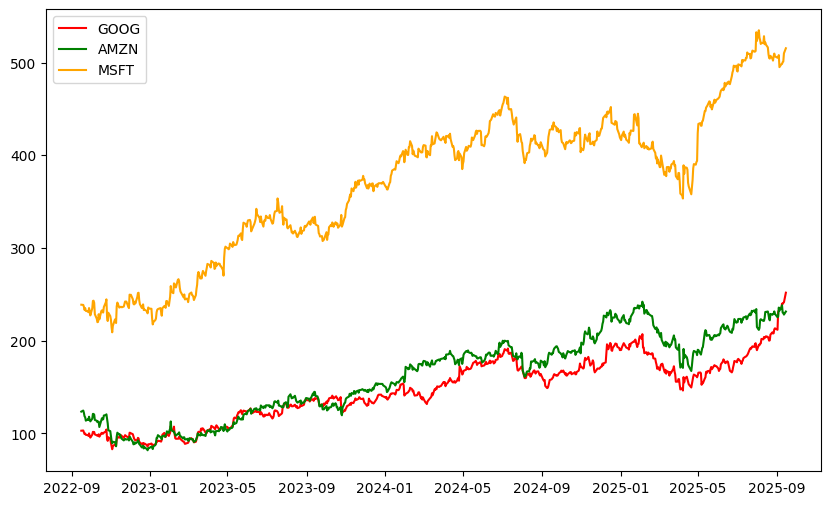

In [10]:
# COMPLETAR: grafica las tres series de precios en una sola gráfica

plt.figure(figsize=(10,6))
plt.plot(datos["GOOG"], label="GOOG",color="red")
plt.plot(datos["AMZN"], label="AMZN",color="green")
plt.plot(datos["MSFT"], label="MSFT",color="orange")
plt.legend()
plt.show()

## 4. Rentabilidades
Calcula las **rentabilidades logarítmicas diarias** y grafícalas.

🔎 **Pregunta:** ¿Qué diferencias encuentras entre observar precios y observar rentabilidades?

**Respuesta:** la gráfica de precios refleja la "trayectoria" y el valor del crecimiento, mientras que la gráfica de rentabilidades refleja la "velocidad" y la "aceleración" de esa trayectoria, siendo más útil para analizar el riesgo y los movimientos diarios.


Ticker,AMZN,GOOG,MSFT
Date,,,
2022-09-16,NaN,NaN,NaN
2022-09-19,0.009106,0.002121,-0.000899
2022-09-20,-0.020013,-0.019643,-0.008501
2022-09-21,-0.030327,-0.018035,-0.014541
2022-09-22,-0.010430,0.005584,0.008460


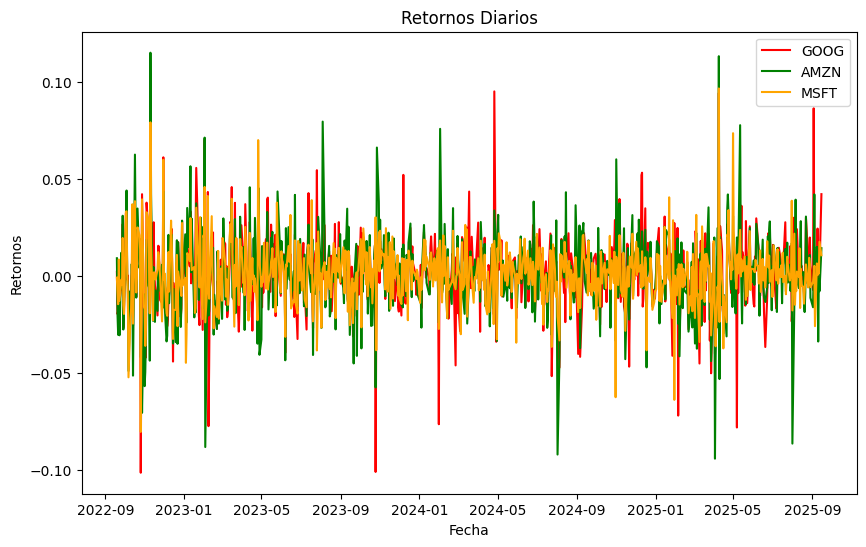

In [19]:
# COMPLETAR: calcula los rendimientos logarítmicos

rendimientos = np.log(datos / datos.shift(1))
display(rendimientos.head())

# Graficar
plt.figure(figsize=(10,6))
plt.plot(rendimientos["GOOG"], label="GOOG", color="red")
plt.plot(rendimientos["AMZN"], label="AMZN",color="green")
plt.plot(rendimientos["MSFT"], label="MSFT",color="orange")
plt.legend()
plt.title("Retornos Diarios")
plt.ylabel("Retornos")
plt.xlabel("Fecha")
plt.show()

## 5. Medidas estadísticas
Calcula la **rentabilidad promedio** y la **volatilidad (desviación estándar)** de cada acción.

🔎 **Pregunta:** ¿Cuál acción es más riesgosa? ¿Cuál ofrece mayor retorno?



**Respuesta:** La acción más riesgosa es la que tiene la mayor volatilidad, ya que esta es una medida del riesgo (cuánto fluctúa el precio). En este caso, Amazon "AMZN" tiene mayor volatilidad (aproximadamente del 0.0213).
La acción que ofrece mayor retorno es la que tiene la mayor rentabilidad promedio diaria. En este caso, es Google "GOOG" la que tiene la mayor rentabilidad promedio diaria (aproximadamente del 0.00119).

In [21]:
# COMPLETAR: calcula media y desviación estándar

media = rendimientos.mean()
volatilidad = rendimientos.std()

print("Rentabilidad promedio diaria:")
display(media)
print("\nVolatilidad diaria:")
display(volatilidad)

Rentabilidad promedio diaria:


,0
Ticker,
AMZN,0.000837
GOOG,0.001193
MSFT,0.001026



Volatilidad diaria:


,0
Ticker,
AMZN,0.021303
GOOG,0.019858
MSFT,0.015991


## 6. Correlación entre activos
Calcula y grafica la matriz de correlación entre las acciones.

🔎 **Pregunta:** ¿Qué significa que dos acciones tengan una correlación cercana a 1? ¿Y cercana a 0 o negativa?

**Respuesta:** La correlación mide la relación lineal entre dos acciones y toma valores entre -1 y 1: cuando es cercana a 1 significa que ambas tienden a moverse en la misma dirección (si una sube, la otra también lo hace), cuando es cercana a 0 indica que no hay relación lineal clara entre sus movimientos, y cuando es negativa cercana a -1 implica que se mueven en direcciones opuestas (si una sube, la otra suele bajar).

AMZN y GOOG: Tienen una correlación de aproximadamente 0.61. Esto indica una correlación positiva moderada, lo que significa que tienden a moverse en la misma dirección.

AMZN y MSFT: Tienen una correlación de aproximadamente 0.65. Esta es la correlación positiva más alta entre las parejas, sugiriendo una tendencia un poco más fuerte a moverse juntas que AMZN y GOOG.

GOOG y MSFT: Tienen una correlación de aproximadamente 0.6. Similar a la de AMZN y GOOG, indica una correlación positiva moderada y una tendencia a moverse en la misma dirección.
En resumen, las tres acciones muestran una correlación positiva moderada entre sí, lo que significa que sus precios tienden a subir y bajar juntos en el mismo período.

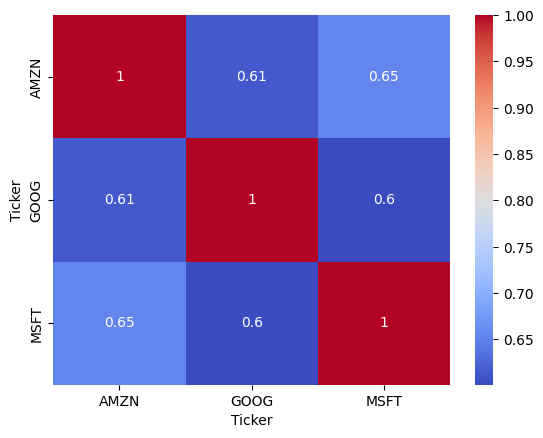

In [26]:
# COMPLETAR: calcula la correlación y haz un mapa de calor con seaborn

correlacion = rendimientos.corr()
sns.heatmap(correlacion, annot=True, cmap="coolwarm")
plt.show()

## 7. Portafolio simulado
Supón un portafolio con la siguiente distribución:
- 40% Google
- 30% Amazon
- 30% Microsoft

Calcula el **retorno esperado** y la **volatilidad del portafolio**.

🔎 **Preguntas:**
1. ¿Cómo interpretas el retorno esperado del portafolio?
2. ¿Qué efecto tuvo la diversificación sobre la volatilidad respecto a invertir en una sola acción?

**Respuestas:**

1. El retorno esperado del portafolio (0.25% anualizado) significa que, en promedio, el portafolio podría generar esa ganancia en un año si los rendimientos pasados se mantienen, aunque no es una garantía.


2. La volatilidad anualizada de 26,6 % muestra el riesgo de la inversión, pero al repartir el dinero entre Google, Amazon y Microsoft (que no se mueven exactamente igual), el portafolio resulta menos riesgoso que invertir en una sola acción, porque las variaciones de unas se compensan con las de otras. En consecuencia, la diversificación redujo el riesgo sin afectar de manera proporcional la rentabilidad.

In [27]:
# COMPLETAR: cálculo del retorno y riesgo del portafolio

pesos = np.array([0.4, 0.3, 0.3])

retorno_portafolio = np.sum(rendimientos.mean() * pesos) * 252  # Anualizado (considerando 252 días hábiles)
covarianza = rendimientos.cov()
vol_portafolio = np.sqrt(np.dot(pesos.T, np.dot(covarianza, pesos))) * np.sqrt(252) # Anualizado

print("Retorno esperado del portafolio (anualizado):", retorno_portafolio)
print("Volatilidad del portafolio (anualizada):", vol_portafolio)

Retorno esperado del portafolio (anualizado): 0.2520774446831889
Volatilidad del portafolio (anualizada): 0.26629499716162947


## ✍️ 8. Conclusión final
Redacta un análisis completo del portafolio respondiendo:
- ¿Qué acción fue más rentable y cuál más riesgosa?
- ¿Qué tan correlacionadas están las acciones?
- ¿Qué aportó la diversificación al portafolio?
- Si fueras un inversionista, ¿invertirías en este portafolio? Justifica tu respuesta.

**Análisis del Portafolio:**

Basada en el análisis de los últimos 3 años de datos de precios de cierre ajustados para Google (GOOG), Amazon (AMZN) y Microsoft (MSFT), se puede concluir lo siguiente:

- **Rentabilidad y Riesgo de las Acciones:**
La acción de **Google (GOOG)** mostró la mayor rentabilidad promedio diaria, mientras que Amazon (AMZN) fue la más riesgosa (mayor volatilidad diaria) durante el período analizado. Microsoft (MSFT) tuvo la menor volatilidad.

- **Correlación entre Acciones:**
Al analizar la matriz de correlación de los rendimientos diarios, observamos que las acciones de **Google (GOOG) y Amazon (AMZN) Microsoft (MSFT)** muestran una correlación positiva moderada entre sí (valores alrededor de 0.60 a 0.65). Esto significa que tienden a moverse en la misma dirección, aunque no de manera perfecta.

- **Aporte de la Diversificación:**
La diversificación en este portafolio ayudó a reducir la volatilidad total del portafolio (riesgo) en comparación con invertir únicamente en las acciones individuales más volátiles. Al combinar los activos, se suavizan los movimientos generales del portafolio.

- **Decisión de Inversión (desde la perspectiva de un inversionista moderado):**
Como inversionista moderada, **probablemente consideraría invertir en este portafolio**,buscando un equilibrio entre el crecimiento del capital y la preservación del mismo, aceptando un nivel de riesgo superior al de un inversionista conservador a cambio de un potencial de retorno mayor.
Este portafolio presenta un retorno esperado anualizado (aproximadamente 25.2%) que es significativamente atractivo, justificando el crecimiento del nivel de volatilidad anualizada (aproximadamente 26.6%) que, aunque es moderado a alto, no es extremo.
